In [39]:
# Imports
import numpy as np
import pandas as pd
import plotly.express as px
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.metrics import mean_squared_error, r2_score, accuracy_score, classification_report

# Inline Plots
%matplotlib inline

In [40]:
# Data Read-In
temperature = pd.read_csv('./data/global_annual_mean_temp.csv', parse_dates=['Year'])
emissions = pd.read_csv('./data/co2-emissions.csv', parse_dates=['Year'])
sea_level = pd.read_csv('./data/epa-sea-level_csv.csv', parse_dates=['Year'])

In [41]:
# Data Details
display(temperature.info())
display(emissions.info())
sea_level.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 143 entries, 0 to 142
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Year          143 non-null    datetime64[ns]
 1   No_Smoothing  143 non-null    float64       
 2   Lowess(5)     143 non-null    float64       
dtypes: datetime64[ns](1), float64(2)
memory usage: 3.5 KB


None

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31349 entries, 0 to 31348
Data columns (total 4 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   Entity                31349 non-null  object        
 1   Code                  24974 non-null  object        
 2   Year                  31349 non-null  datetime64[ns]
 3   Annual CO₂ emissions  31349 non-null  float64       
dtypes: datetime64[ns](1), float64(1), object(2)
memory usage: 979.8+ KB


None

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 135 entries, 0 to 134
Data columns (total 5 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   Year                      135 non-null    datetime64[ns]
 1   CSIRO Adjusted Sea Level  134 non-null    float64       
 2   Lower Error Bound         134 non-null    float64       
 3   Upper Error Bound         134 non-null    float64       
 4   NOAA Adjusted Sea Level   22 non-null     float64       
dtypes: datetime64[ns](1), float64(4)
memory usage: 5.4 KB


In [42]:
# Preview datasets
display(temperature.head())
display(emissions.head())
sea_level.head()

,Year,No_Smoothing,Lowess(5)
0,1880-01-01,-0.17,-0.10
1,1881-01-01,-0.09,-0.13
2,1882-01-01,-0.11,-0.17
3,1883-01-01,-0.18,-0.20
4,1884-01-01,-0.28,-0.24


,Entity,Code,Year,Annual CO₂ emissions
0,Afghanistan,AFG,1949-01-01,14656.0
1,Afghanistan,AFG,1950-01-01,84272.0
2,Afghanistan,AFG,1951-01-01,91600.0
3,Afghanistan,AFG,1952-01-01,91600.0
4,Afghanistan,AFG,1953-01-01,106256.0


,Year,CSIRO Adjusted Sea Level,Lower Error Bound,Upper Error Bound,NOAA Adjusted Sea Level
0,1880-03-15,0.000000,-0.952756,0.952756,NaN
1,1881-03-15,0.220472,-0.732283,1.173228,NaN
2,1882-03-15,-0.440945,-1.346457,0.464567,NaN
3,1883-03-15,-0.232283,-1.129921,0.665354,NaN
4,1884-03-15,0.590551,-0.283465,1.464567,NaN


In [43]:
# Drop unneeded column: Lowess(5)
temperature = temperature.drop(columns=['Year', 'Lowess(5)'])

In [44]:
# Rename columns
temperature.columns = ['Temperature Change']

In [45]:
# Drop unneeded columns
emissions = emissions.drop(columns=['Year', 'Entity', 'Code'])

In [46]:
# Rename columns
emissions.columns = ['CO2 Emissions']

In [47]:
# Drop unneeded columns
sea_level = sea_level.drop(columns=['Year', 'Lower Error Bound', 'Upper Error Bound'])

In [48]:
# Rename columns
sea_level.columns = ['Sea Level 1', 'Sea Level 2']

In [49]:
# Drop na's
sea_level = sea_level.dropna()

In [50]:
# Get info
temperature.shape

(143, 1)

In [51]:
# Preview dataframes
display(temperature.head())
display(emissions.head())
sea_level.head()

,Temperature Change
0,-0.17
1,-0.09
2,-0.11
3,-0.18
4,-0.28


,CO2 Emissions
0,14656.0
1,84272.0
2,91600.0
3,91600.0
4,106256.0


,Sea Level 1,Sea Level 2
113,6.291339,6.297493
114,6.500000,6.310934
115,6.618110,6.452569
116,6.787402,6.627631
117,7.066929,6.733920


In [52]:
# Create plots
temperatures_plot = px.line(temperature, title='Temperature Change')
emissions_plot = px.line(emissions, title='Emissions Change')
sea_levels_plot = px.line(sea_level, title='Sea Level Change')

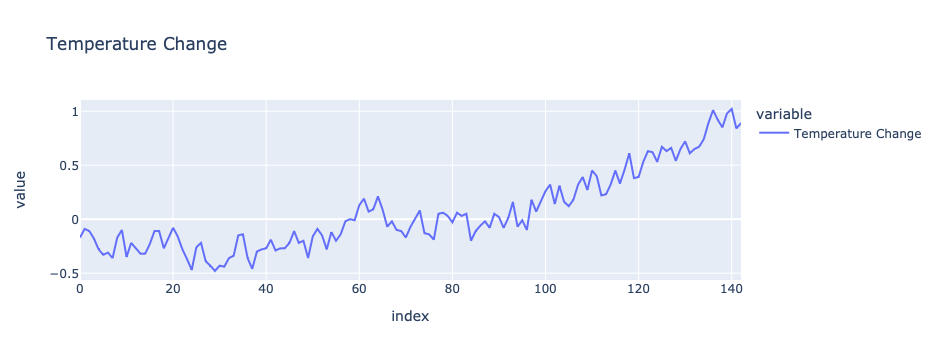

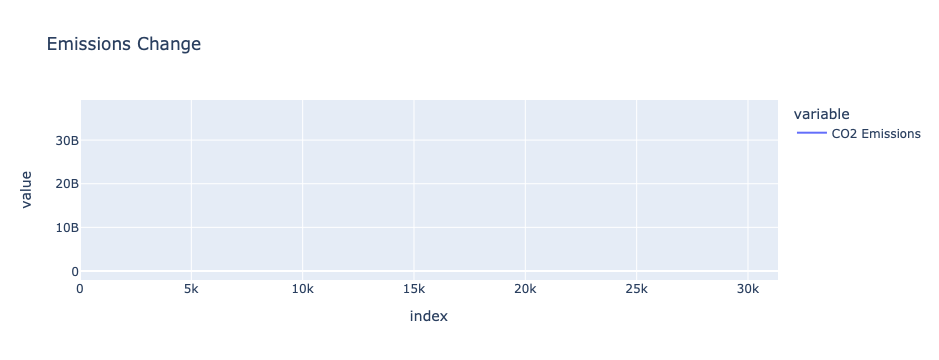

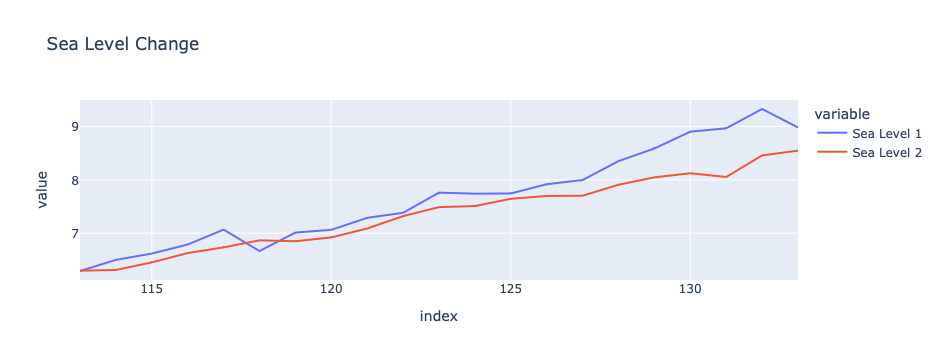

In [53]:
# Display plots
temperatures_plot.show()
emissions_plot.show()
sea_levels_plot.show()

# Data Prep
---

In [74]:
# Concatenate datasets
features_df = pd.concat([sea_level, temperature], axis=0)

In [75]:
# Fill back na's
features_df.fillna(method='bfill', inplace=True)

In [76]:
# Fill forward na's
features_df.fillna(method='ffill', inplace=True)

In [77]:
# Display head & tail
display(features_df.head())
features_df.tail()

,Sea Level 1,Sea Level 2,Temperature Change
113,6.291339,6.297493,-0.17
114,6.500000,6.310934,-0.17
115,6.618110,6.452569,-0.17
116,6.787402,6.627631,-0.17
117,7.066929,6.733920,-0.17


,Sea Level 1,Sea Level 2,Temperature Change
138,8.980315,8.546648,0.85
139,8.980315,8.546648,0.98
140,8.980315,8.546648,1.02
141,8.980315,8.546648,0.84
142,8.980315,8.546648,0.89


In [79]:
# Get shape, info, & description
display(features_df.shape)
display(features_df.info())
features_df.describe()

(164, 3)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 164 entries, 113 to 142
Data columns (total 3 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Sea Level 1         164 non-null    float64
 1   Sea Level 2         164 non-null    float64
 2   Temperature Change  164 non-null    float64
dtypes: float64(3)
memory usage: 5.1 KB


None

,Sea Level 1,Sea Level 2,Temperature Change
count,164.000000,164.000000,164.000000
mean,8.811744,8.395179,0.030366
std,0.545118,0.464523,0.351974
min,6.291339,6.297493,-0.480000
25%,8.980315,8.546648,-0.180000
50%,8.980315,8.546648,-0.100000
75%,8.980315,8.546648,0.182500
max,9.326772,8.546648,1.020000


In [80]:
# Set target
y = ['Temperature Change']

In [81]:
# Set features
X = list(set(list(features_df.columns))-set(y))

In [82]:
# Normalize features
features_df[X] = features_df[X]/features_df[X].max()

In [83]:
# Get description
features_df.describe()

,Sea Level 1,Sea Level 2,Temperature Change
count,164.000000,164.000000,164.000000
mean,0.944780,0.982277,0.030366
std,0.058447,0.054352,0.351974
min,0.674546,0.736838,-0.480000
25%,0.962854,1.000000,-0.180000
50%,0.962854,1.000000,-0.100000
75%,0.962854,1.000000,0.182500
max,1.000000,1.000000,1.020000


In [84]:
# Set predictor values to X
X = features_df[X].values

In [86]:
# Set target value to y
y = features_df[y].values

In [121]:
# Create train, test, split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.27, random_state=72)

# Baseline Model (Linear Regression)
---

In [122]:
# Instantiate linear regression model
lr_model = LinearRegression()

In [123]:
# Fit lr_model to the data
lr_model.fit(X_train,y_train)

LinearRegression()

In [124]:
# Make baseline training prediction
lr_train_prediction = lr_model.predict(X_train)

In [125]:
# Display outputs
display(np.sqrt(mean_squared_error(y_train,lr_train_prediction)))
(r2_score(y_train, lr_train_prediction))

0.3277799523929913

0.031207129260823474

In [126]:
# Make baseline test prediction
lr_test_prediction = lr_model.predict(X_test)

In [127]:
# Display outputs
display(np.sqrt(mean_squared_error(y_test, lr_test_prediction))) 
r2_score(y_test, lr_test_prediction)

0.3853733146499755

0.03896509560969019

# Test Model (Ridge Regression)
---

In [159]:
# Instantiate ridge regression model with normalize=True
rr_model = Ridge(alpha=0.3)

In [160]:
# Fit the ridge regression model to X_train & y_train
rr_model.fit(X_train, y_train)

Ridge(alpha=0.3)

In [161]:
# Make ridge regression train prediction
rr_train_prediction = rr_model.predict(X_train)

In [162]:
# Display outputs
display(np.sqrt(mean_squared_error(y_train, rr_train_prediction)))
r2_score(y_train, rr_train_prediction)

0.32939827002942484

0.02161725111080015

In [163]:
# Make ridge regression test prediction
rr_test_prediction = rr_model.predict(X_test)

In [164]:
# Display outputs
display(np.sqrt(mean_squared_error(y_test, rr_test_prediction)))
r2_score(y_test, rr_test_prediction)

0.38696927838146056

0.03098865955153962

In [170]:
# Additional metrics
print("Mean Squared Error: %.2f" % mean_squared_error(y_test, rr_test_prediction))
print("Square Root: %.2f" % np.sqrt(mean_squared_error(y_test, rr_test_prediction)))
print("Rsquared: %.2f" % rr_model.score(X_test, y_test))

Mean Squared Error: 0.15
Square Root: 0.39
Rsquared: 0.03


In [175]:
train_pred_df = pd.DataFrame(rr_train_prediction)
test_pred_df = pd.DataFrame(rr_test_prediction)

In [176]:
train_pred_df.columns = ['X Predictions']
test_pred_df.columns = ['y Predictions']

In [180]:
train_pred_plot = px.line(train_pred_df, title='X Train Predictions')
test_pred_plot = px.line(test_pred_df, title='X Test Predictions')

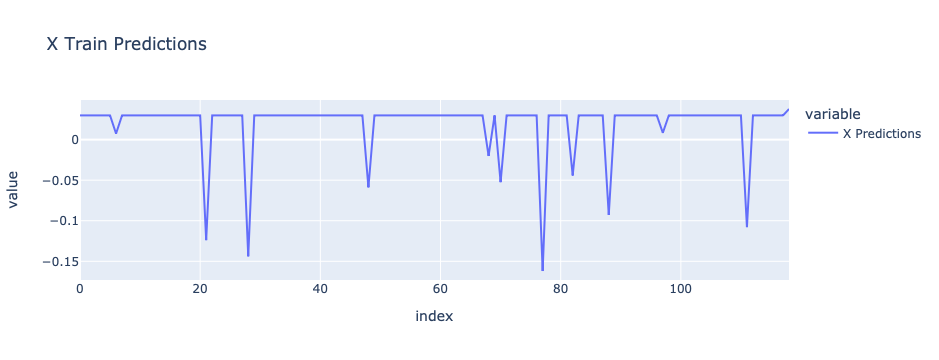

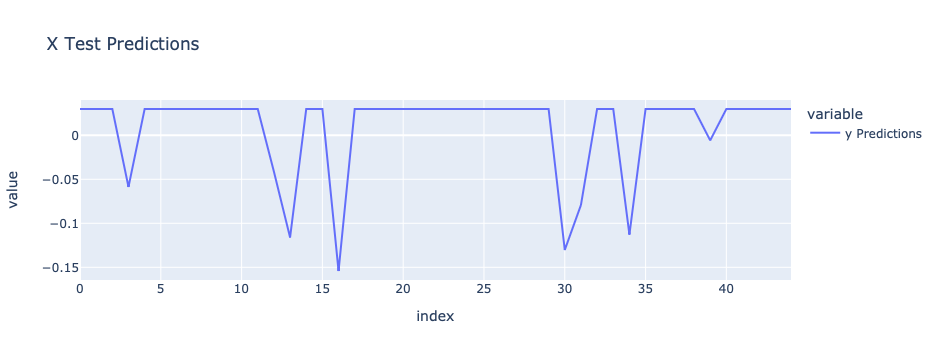

In [181]:
train_pred_plot.show()
test_pred_plot.show()